In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as mt
import sys
sys.path.append('../../')
from emnlp20.fidelity.fidelity import Fidelity

sns.set(font_scale=3.0, rc={
    "lines.linewidth": 3,
    "lines.markersize":20,
    "ps.useafm": True,
    "axes.facecolor": 'white',
    "font.sans-serif": ["Helvetica"],
    "pdf.use14corefonts" : True,
    "text.usetex": False,
    })

LINEWIDTH = 3
MARKERSIZE = 10
TICKLABELSIZE = 14
LEGENDLABELSIZE = 14
LABELSIZE = 23
import matplotlib as mpl
mpl.rcParams['hatch.linewidth'] = 1.0


In [2]:
pd.set_option('display.width', 5000)
pd.set_option('max_colwidth', 150)
pd.set_option('max_columns', 50)
# pd.set_option('display.max_rows', 50)
pd.set_option('max_rows', 100)
pd.set_option('min_rows', 100)

pd.set_option('precision', 3)

In [3]:
experiment_directory = '/data/sam/mita/output/evaluating_human_rationales/roberta/'

model_dirs = ['d=sst_hdp=0.1_lr=2e-05_nte=5',
              'd=movies_hdp=0.1_lr=2e-05_nte=5',
              'd=multirc_hdp=0.1_lr=2e-05_nte=5',
              'd=fever_hdp=0.1_lr=2e-05_nte=5',
              'd=esnli_hdp=0.1_lr=2e-05_nte=5',
              'd=wikiattack_hdp=0.1_lr=2e-05_nte=5'
             ]

In [4]:
def subdir_paths(dir_path):
	try:
		filenames = os.listdir(dir_path)
		paths = [(filename, os.path.join(dir_path, filename)) for filename in filenames]
		subdir_paths = [(filename, filepath) for filename, filepath in paths if os.path.isdir(filepath)]
		return sorted(subdir_paths, key=lambda t: t[0])
	except:
		return []


In [5]:
def parse_combo_name(combo_name, abb_dict=None):
#     print(combo_name)
    pieces = [piece.split('_') for piece in combo_name.split('=')]
#     print(pieces)
    valdict = {}
    for i in range(1,len(pieces)):
#         print(pieces[i-1][-1])
#         print('_'.join(pieces[i][:-1]))
        key = pieces[i-1][-1]
        value = '_'.join(pieces[i][:-1]) if i < len(pieces)-1 else '_'.join(pieces[i])
        if abb_dict is not None and key in abb_dict:
            key = abb_dict[key]
        valdict[key] = value
        
    return valdict
    

In [6]:
dfs=[]
for model_dir in model_dirs:
    combo = parse_combo_name(model_dir)
    print(combo)
    curve_directory = os.path.join(experiment_directory, model_dir, 'fidelity_curves')
    for occlusion_rate, occlusion_dir in subdir_paths(curve_directory):
        print('\t',occlusion_rate)
        for sample_num, sample_dir in subdir_paths(occlusion_dir):
            print('\t\t',sample_num)
            try:
                df = pd.read_csv(os.path.join(sample_dir,'feature.csv'),index_col=0)
                df['occlusion_rate'] = float(occlusion_rate)
                df['sample_num'] = int(sample_num)
                df['combo_name'] = model_dir
                for key, value in combo.items():
                    df[key] = value
                dfs.append(df)
                acc = mt.accuracy_score(df['true_classes'],df['predicted_classes'])
                df['acc'] = acc
            except Exception as ex:
                print(ex)

all_df = pd.concat(dfs,axis=0)
all_df.shape


{'d': 'sst', 'hdp': '0.1', 'lr': '2e-05', 'nte': '5'}
	 0.0
		 0
	 0.05
		 0
	 0.1
		 0
	 0.15
		 0
	 0.2
		 0
	 0.25
		 0
	 0.3
		 0
	 0.35
		 0
	 0.4
		 0
	 0.45
		 0
	 0.5
		 0
	 0.55
		 0
	 0.6
		 0
	 0.65
		 0
	 0.7
		 0
	 0.75
		 0
	 0.8
		 0
	 0.85
		 0
	 0.9
		 0
	 0.95
		 0
	 1.0
		 0
{'d': 'movies', 'hdp': '0.1', 'lr': '2e-05', 'nte': '5'}
	 0.0
		 0
	 0.05
		 0
	 0.1
		 0
	 0.15
		 0
	 0.2
		 0
	 0.25
		 0
	 0.3
		 0
	 0.35
		 0
	 0.4
		 0
	 0.45
		 0
	 0.5
		 0
	 0.55
		 0
	 0.6
		 0
	 0.65
		 0
	 0.7
		 0
	 0.75
		 0
	 0.8
		 0
	 0.85
		 0
	 0.9
		 0
	 0.95
		 0
	 1.0
		 0
{'d': 'multirc', 'hdp': '0.1', 'lr': '2e-05', 'nte': '5'}
	 0.0
		 0
	 0.05
		 0
	 0.1
		 0
	 0.15
		 0
	 0.2
		 0
	 0.25
		 0
	 0.3
		 0
	 0.35
		 0
	 0.4
		 0
	 0.45
		 0
	 0.5
		 0
	 0.55
		 0
	 0.6
		 0
	 0.65
		 0
	 0.7
		 0
	 0.75
		 0
	 0.8
		 0
	 0.85
		 0
	 0.9
		 0
	 0.95
		 0
	 1.0
		 0
{'d': 'fever', 'hdp': '0.1', 'lr': '2e-05', 'nte': '5'}
	 0.0
		 0
	 0.05
		 0
	 0.1
		 0
	 0.15
		 0
	 0.2


(489846, 17)

In [7]:
all_df

,id,prob_y_hat,prob_y_hat_alpha,eval_prob_y_hat_alpha,prob_y_hat_alpha_comp,null_diff,true_classes,predicted_classes,zero_probs,occlusion_rate,sample_num,combo_name,d,hdp,lr,nte,acc
0,1.58e+03,1.000,0.480,0.520,9.997e-01,5.201e-01,0.0,0.0,[0.47956678 0.5204332 ],0.0,0,d=sst_hdp=0.1_lr=2e-05_nte=5,sst,0.1,2e-05,5,0.943
1,390,1.000,0.520,0.520,9.998e-01,4.794e-01,1.0,1.0,[0.47956678 0.5204332 ],0.0,0,d=sst_hdp=0.1_lr=2e-05_nte=5,sst,0.1,2e-05,5,0.943
2,628,1.000,0.520,0.520,9.998e-01,4.794e-01,1.0,1.0,[0.47956678 0.5204332 ],0.0,0,d=sst_hdp=0.1_lr=2e-05_nte=5,sst,0.1,2e-05,5,0.943
3,1.86e+03,0.995,0.520,0.520,9.946e-01,4.742e-01,0.0,1.0,[0.47956678 0.5204332 ],0.0,0,d=sst_hdp=0.1_lr=2e-05_nte=5,sst,0.1,2e-05,5,0.943
4,1.72e+03,1.000,0.480,0.520,9.997e-01,5.201e-01,0.0,0.0,[0.47956678 0.5204332 ],0.0,0,d=sst_hdp=0.1_lr=2e-05_nte=5,sst,0.1,2e-05,5,0.943
5,147,1.000,0.520,0.520,9.998e-01,4.794e-01,1.0,1.0,[0.47956678 0.5204332 ],0.0,0,d=sst_hdp=0.1_lr=2e-05_nte=5,sst,0.1,2e-05,5,0.943
6,1.60e+03,1.000,0.480,0.520,9.997e-01,5.201e-01,0.0,0.0,[0.47956678 0.5204332 ],0.0,0,d=sst_hdp=0.1_lr=2e-05_nte=5,sst,0.1,2e-05,5,0.943
7,211,1.000,0.520,0.520,9.998e-01,4.794e-01,1.0,1.0,[0.47956678 0.5204332 ],0.0,0,d=sst_hdp=0.1_lr=2e-05_nte=5,sst,0.1,2e-05,5,0.943
8,75,1.000,0.520,0.520,9.997e-01,4.792e-01,0.0,1.0,[0.47956678 0.5204332 ],0.0,0,d=sst_hdp=0.1_lr=2e-05_nte=5,sst,0.1,2e-05,5,0.943
9,920,1.000,0.520,0.520,9.998e-01,4.794e-01,1.0,1.0,[0.47956678 0.5204332 ],0.0,0,d=sst_hdp=0.1_lr=2e-05_nte=5,sst,0.1,2e-05,5,0.943


In [22]:
all_df['raw_sufficiency'] = 1-(all_df['prob_y_hat'] - all_df['prob_y_hat_alpha'])
# all_df['clipped_sufficiency'] = 1-np.clip(all_df['raw_sufficiency'],0,1)
# all_df['clipped_0_sufficiency'] = 1-np.clip(all_df['null_diff'],0,1)

# all_df['normalized_sufficiency'] = (all_df['clipped_sufficiency']-all_df['clipped_0_sufficiency'])/(1-all_df['clipped_0_sufficiency'])
# with pd.option_context('mode.use_inf_as_na', True):
#     all_df['normalized_sufficiency'].fillna(0.0, inplace=True)


all_df['raw_comprehensiveness'] = all_df['prob_y_hat'] - all_df['prob_y_hat_alpha_comp']
# all_df['clipped_comprehensiveness'] = np.clip(all_df['raw_comprehensiveness'],0,1)
# all_df['clipped_1_comprehensiveness'] = np.clip(all_df['null_diff'],0,1)

# all_df['normalized_comprehensiveness'] = all_df['clipped_comprehensiveness']/all_df['clipped_1_comprehensiveness']
# with pd.option_context('mode.use_inf_as_na', True):
#     all_df['normalized_comprehensiveness'].fillna(0.0, inplace=True)


fidelity_calculator = Fidelity(experiment_id='fidelity_curve_plotting_2')
all_df['normalized_sufficiency']  = fidelity_calculator.compute(
	prob_y_hat=all_df['prob_y_hat'].values,
	prob_y_hat_alpha=all_df['prob_y_hat_alpha'].values,
	null_difference=all_df['null_diff'].values,
	normalization=True,
    reduction=None)

all_df['normalized_comprehensiveness'] = fidelity_calculator.compute(
	prob_y_hat=all_df['prob_y_hat'].values,
	prob_y_hat_alpha=all_df['prob_y_hat_alpha_comp'].values,
	null_difference=all_df['null_diff'].values,
	fidelity_type="comprehensiveness",
	normalization=True,
reduction=None)

all_df['clipped_sufficiency']  = fidelity_calculator.compute(
	prob_y_hat=all_df['prob_y_hat'].values,
	prob_y_hat_alpha=all_df['prob_y_hat_alpha'].values,
	null_difference=all_df['null_diff'].values,
	normalization=False,
reduction=None)

all_df['clipped_comprehensiveness'] = fidelity_calculator.compute(
	prob_y_hat=all_df['prob_y_hat'].values,
	prob_y_hat_alpha=all_df['prob_y_hat_alpha_comp'].values,
	null_difference=all_df['null_diff'].values,
	fidelity_type="comprehensiveness",
	normalization=False,
reduction=None)

all_df

,id,prob_y_hat,prob_y_hat_alpha,eval_prob_y_hat_alpha,prob_y_hat_alpha_comp,null_diff,true_classes,predicted_classes,zero_probs,occlusion_rate,sample_num,combo_name,d,hdp,lr,nte,acc,raw_sufficiency,raw_comprehensiveness,normalized_sufficiency,normalized_comprehensiveness,clipped_sufficiency,clipped_comprehensiveness
0,1.58e+03,1.000,0.480,0.520,9.997e-01,5.201e-01,0.0,0.0,[0.47956678 0.5204332 ],0.0,0,d=sst_hdp=0.1_lr=2e-05_nte=5,sst,0.1,2e-05,5,0.943,0.480,0.000e+00,0.000e+00,0.00,0.480,0.000e+00
1,390,1.000,0.520,0.520,9.998e-01,4.794e-01,1.0,1.0,[0.47956678 0.5204332 ],0.0,0,d=sst_hdp=0.1_lr=2e-05_nte=5,sst,0.1,2e-05,5,0.943,0.521,0.000e+00,0.000e+00,0.00,0.521,0.000e+00
2,628,1.000,0.520,0.520,9.998e-01,4.794e-01,1.0,1.0,[0.47956678 0.5204332 ],0.0,0,d=sst_hdp=0.1_lr=2e-05_nte=5,sst,0.1,2e-05,5,0.943,0.521,0.000e+00,0.000e+00,0.00,0.521,0.000e+00
3,1.86e+03,0.995,0.520,0.520,9.946e-01,4.742e-01,0.0,1.0,[0.47956678 0.5204332 ],0.0,0,d=sst_hdp=0.1_lr=2e-05_nte=5,sst,0.1,2e-05,5,0.943,0.526,0.000e+00,0.000e+00,0.00,0.526,0.000e+00
4,1.72e+03,1.000,0.480,0.520,9.997e-01,5.201e-01,0.0,0.0,[0.47956678 0.5204332 ],0.0,0,d=sst_hdp=0.1_lr=2e-05_nte=5,sst,0.1,2e-05,5,0.943,0.480,0.000e+00,0.000e+00,0.00,0.480,0.000e+00
5,147,1.000,0.520,0.520,9.998e-01,4.794e-01,1.0,1.0,[0.47956678 0.5204332 ],0.0,0,d=sst_hdp=0.1_lr=2e-05_nte=5,sst,0.1,2e-05,5,0.943,0.521,0.000e+00,0.000e+00,0.00,0.521,0.000e+00
6,1.60e+03,1.000,0.480,0.520,9.997e-01,5.201e-01,0.0,0.0,[0.47956678 0.5204332 ],0.0,0,d=sst_hdp=0.1_lr=2e-05_nte=5,sst,0.1,2e-05,5,0.943,0.480,0.000e+00,0.000e+00,0.00,0.480,0.000e+00
7,211,1.000,0.520,0.520,9.998e-01,4.794e-01,1.0,1.0,[0.47956678 0.5204332 ],0.0,0,d=sst_hdp=0.1_lr=2e-05_nte=5,sst,0.1,2e-05,5,0.943,0.521,0.000e+00,0.000e+00,0.00,0.521,0.000e+00
8,75,1.000,0.520,0.520,9.997e-01,4.792e-01,0.0,1.0,[0.47956678 0.5204332 ],0.0,0,d=sst_hdp=0.1_lr=2e-05_nte=5,sst,0.1,2e-05,5,0.943,0.521,0.000e+00,2.317e-16,0.00,0.521,0.000e+00
9,920,1.000,0.520,0.520,9.998e-01,4.794e-01,1.0,1.0,[0.47956678 0.5204332 ],0.0,0,d=sst_hdp=0.1_lr=2e-05_nte=5,sst,0.1,2e-05,5,0.943,0.521,0.000e+00,0.000e+00,0.00,0.521,0.000e+00


In [23]:
with pd.option_context('mode.use_inf_as_na', True):
    na_df = all_df[all_df['normalized_sufficiency'].isna()]

print(na_df['normalized_sufficiency'].value_counts())
na_df

Series([], Name: normalized_sufficiency, dtype: int64)


,id,prob_y_hat,prob_y_hat_alpha,eval_prob_y_hat_alpha,prob_y_hat_alpha_comp,null_diff,true_classes,predicted_classes,zero_probs,occlusion_rate,sample_num,combo_name,d,hdp,lr,nte,acc,raw_sufficiency,raw_comprehensiveness,normalized_sufficiency,normalized_comprehensiveness,clipped_sufficiency,clipped_comprehensiveness


In [24]:
meaned_across_points = all_df.groupby(['combo_name', 'occlusion_rate','sample_num','d'],as_index=False).mean()
meaned_across_points

,combo_name,occlusion_rate,sample_num,d,prob_y_hat,prob_y_hat_alpha,eval_prob_y_hat_alpha,prob_y_hat_alpha_comp,null_diff,true_classes,predicted_classes,acc,raw_sufficiency,raw_comprehensiveness,normalized_sufficiency,normalized_comprehensiveness,clipped_sufficiency,clipped_comprehensiveness
0,d=esnli_hdp=0.1_lr=2e-05_nte=5,0.00,0,esnli,0.951,0.330,0.674,0.951,0.624,0.998,0.994,0.915,0.378,0.000e+00,5.957e-09,0.000,0.376,0.000
1,d=esnli_hdp=0.1_lr=2e-05_nte=5,0.05,0,esnli,0.951,0.347,0.659,0.921,0.624,0.998,0.994,0.915,0.396,3.008e-02,5.235e-02,0.041,0.394,0.032
2,d=esnli_hdp=0.1_lr=2e-05_nte=5,0.10,0,esnli,0.951,0.358,0.651,0.885,0.624,0.998,0.994,0.915,0.406,6.679e-02,9.187e-02,0.088,0.404,0.070
3,d=esnli_hdp=0.1_lr=2e-05_nte=5,0.15,0,esnli,0.951,0.365,0.652,0.859,0.624,0.998,0.994,0.915,0.413,9.219e-02,1.232e-01,0.123,0.411,0.097
4,d=esnli_hdp=0.1_lr=2e-05_nte=5,0.20,0,esnli,0.951,0.372,0.655,0.820,0.624,0.998,0.994,0.915,0.420,1.315e-01,1.524e-01,0.173,0.418,0.137
5,d=esnli_hdp=0.1_lr=2e-05_nte=5,0.25,0,esnli,0.951,0.384,0.658,0.797,0.624,0.998,0.994,0.915,0.432,1.546e-01,1.767e-01,0.202,0.430,0.160
6,d=esnli_hdp=0.1_lr=2e-05_nte=5,0.30,0,esnli,0.951,0.398,0.666,0.772,0.624,0.998,0.994,0.915,0.447,1.794e-01,2.072e-01,0.233,0.444,0.186
7,d=esnli_hdp=0.1_lr=2e-05_nte=5,0.35,0,esnli,0.951,0.404,0.671,0.738,0.624,0.998,0.994,0.915,0.453,2.137e-01,2.289e-01,0.274,0.450,0.221
8,d=esnli_hdp=0.1_lr=2e-05_nte=5,0.40,0,esnli,0.951,0.420,0.684,0.710,0.624,0.998,0.994,0.915,0.468,2.414e-01,2.544e-01,0.309,0.465,0.248
9,d=esnli_hdp=0.1_lr=2e-05_nte=5,0.45,0,esnli,0.951,0.435,0.693,0.691,0.624,0.998,0.994,0.915,0.483,2.602e-01,2.812e-01,0.332,0.479,0.267


In [25]:
meaned_across_samples = meaned_across_points.groupby(['combo_name', 'occlusion_rate','d'],as_index=False).mean()
meaned_across_samples

,combo_name,occlusion_rate,d,sample_num,prob_y_hat,prob_y_hat_alpha,eval_prob_y_hat_alpha,prob_y_hat_alpha_comp,null_diff,true_classes,predicted_classes,acc,raw_sufficiency,raw_comprehensiveness,normalized_sufficiency,normalized_comprehensiveness,clipped_sufficiency,clipped_comprehensiveness
0,d=esnli_hdp=0.1_lr=2e-05_nte=5,0.00,esnli,0,0.951,0.330,0.674,0.951,0.624,0.998,0.994,0.915,0.378,0.000e+00,5.957e-09,0.000,0.376,0.000
1,d=esnli_hdp=0.1_lr=2e-05_nte=5,0.05,esnli,0,0.951,0.347,0.659,0.921,0.624,0.998,0.994,0.915,0.396,3.008e-02,5.235e-02,0.041,0.394,0.032
2,d=esnli_hdp=0.1_lr=2e-05_nte=5,0.10,esnli,0,0.951,0.358,0.651,0.885,0.624,0.998,0.994,0.915,0.406,6.679e-02,9.187e-02,0.088,0.404,0.070
3,d=esnli_hdp=0.1_lr=2e-05_nte=5,0.15,esnli,0,0.951,0.365,0.652,0.859,0.624,0.998,0.994,0.915,0.413,9.219e-02,1.232e-01,0.123,0.411,0.097
4,d=esnli_hdp=0.1_lr=2e-05_nte=5,0.20,esnli,0,0.951,0.372,0.655,0.820,0.624,0.998,0.994,0.915,0.420,1.315e-01,1.524e-01,0.173,0.418,0.137
5,d=esnli_hdp=0.1_lr=2e-05_nte=5,0.25,esnli,0,0.951,0.384,0.658,0.797,0.624,0.998,0.994,0.915,0.432,1.546e-01,1.767e-01,0.202,0.430,0.160
6,d=esnli_hdp=0.1_lr=2e-05_nte=5,0.30,esnli,0,0.951,0.398,0.666,0.772,0.624,0.998,0.994,0.915,0.447,1.794e-01,2.072e-01,0.233,0.444,0.186
7,d=esnli_hdp=0.1_lr=2e-05_nte=5,0.35,esnli,0,0.951,0.404,0.671,0.738,0.624,0.998,0.994,0.915,0.453,2.137e-01,2.289e-01,0.274,0.450,0.221
8,d=esnli_hdp=0.1_lr=2e-05_nte=5,0.40,esnli,0,0.951,0.420,0.684,0.710,0.624,0.998,0.994,0.915,0.468,2.414e-01,2.544e-01,0.309,0.465,0.248
9,d=esnli_hdp=0.1_lr=2e-05_nte=5,0.45,esnli,0,0.951,0.435,0.693,0.691,0.624,0.998,0.994,0.915,0.483,2.602e-01,2.812e-01,0.332,0.479,0.267


In [26]:
dataset_codes = ["sst",'movies','multirc','esnli','fever','wikiattack']
datasets = ["Stanford treebank", "movie reviews", "MultiRC", "E-SNLI", "FEVER", "Wikipedia personal attacks", "Wikipedia personal attacks (small)"]
datasetabs = ["SST", "Movie", "MultiRC", "E-SNLI", "FEVER", "WikiAttack", "WikiSmall"]
dataset_ab_dict = {}
for i in range(len(datasets)):
    dataset_ab_dict[datasets[i]] = datasetabs[i]
markers = ["^", "*", "<", ">", "o", "v",'v']
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

dataset_colors = {}
dataset_colors_idx = {}
dataset_markers = {}
acc_labels = {}

for i in range(len(dataset_codes)):
    dataset_colors[dataset_codes[i]] = colors[i]
    dataset_markers[dataset_codes[i]] = markers[i]
    acc_labels[dataset_codes[i]] = datasetabs[i]
    dataset_colors_idx[i] = colors[i]

In [27]:
 meaned_across_samples
    

,combo_name,occlusion_rate,d,sample_num,prob_y_hat,prob_y_hat_alpha,eval_prob_y_hat_alpha,prob_y_hat_alpha_comp,null_diff,true_classes,predicted_classes,acc,raw_sufficiency,raw_comprehensiveness,normalized_sufficiency,normalized_comprehensiveness,clipped_sufficiency,clipped_comprehensiveness
0,d=esnli_hdp=0.1_lr=2e-05_nte=5,0.00,esnli,0,0.951,0.330,0.674,0.951,0.624,0.998,0.994,0.915,0.378,0.000e+00,5.957e-09,0.000,0.376,0.000
1,d=esnli_hdp=0.1_lr=2e-05_nte=5,0.05,esnli,0,0.951,0.347,0.659,0.921,0.624,0.998,0.994,0.915,0.396,3.008e-02,5.235e-02,0.041,0.394,0.032
2,d=esnli_hdp=0.1_lr=2e-05_nte=5,0.10,esnli,0,0.951,0.358,0.651,0.885,0.624,0.998,0.994,0.915,0.406,6.679e-02,9.187e-02,0.088,0.404,0.070
3,d=esnli_hdp=0.1_lr=2e-05_nte=5,0.15,esnli,0,0.951,0.365,0.652,0.859,0.624,0.998,0.994,0.915,0.413,9.219e-02,1.232e-01,0.123,0.411,0.097
4,d=esnli_hdp=0.1_lr=2e-05_nte=5,0.20,esnli,0,0.951,0.372,0.655,0.820,0.624,0.998,0.994,0.915,0.420,1.315e-01,1.524e-01,0.173,0.418,0.137
5,d=esnli_hdp=0.1_lr=2e-05_nte=5,0.25,esnli,0,0.951,0.384,0.658,0.797,0.624,0.998,0.994,0.915,0.432,1.546e-01,1.767e-01,0.202,0.430,0.160
6,d=esnli_hdp=0.1_lr=2e-05_nte=5,0.30,esnli,0,0.951,0.398,0.666,0.772,0.624,0.998,0.994,0.915,0.447,1.794e-01,2.072e-01,0.233,0.444,0.186
7,d=esnli_hdp=0.1_lr=2e-05_nte=5,0.35,esnli,0,0.951,0.404,0.671,0.738,0.624,0.998,0.994,0.915,0.453,2.137e-01,2.289e-01,0.274,0.450,0.221
8,d=esnli_hdp=0.1_lr=2e-05_nte=5,0.40,esnli,0,0.951,0.420,0.684,0.710,0.624,0.998,0.994,0.915,0.468,2.414e-01,2.544e-01,0.309,0.465,0.248
9,d=esnli_hdp=0.1_lr=2e-05_nte=5,0.45,esnli,0,0.951,0.435,0.693,0.691,0.624,0.998,0.994,0.915,0.483,2.602e-01,2.812e-01,0.332,0.479,0.267


<ipython-input-28-267b69a93af6>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['occlusion_rate'] = 1-dataset_df['occlusion_rate']


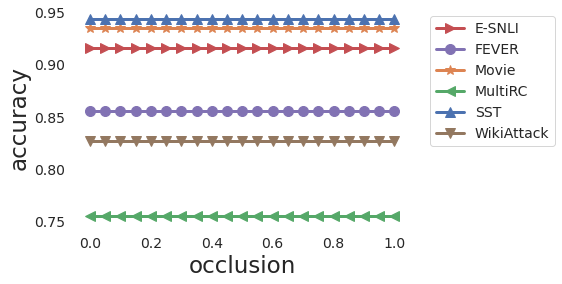

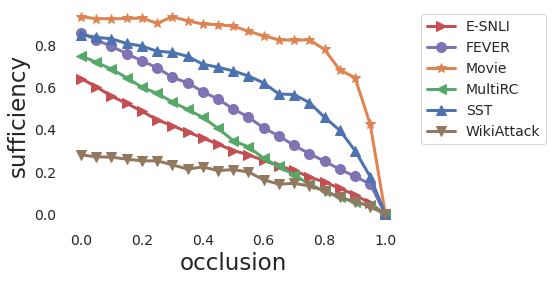

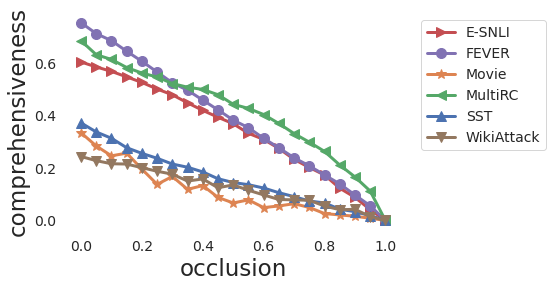

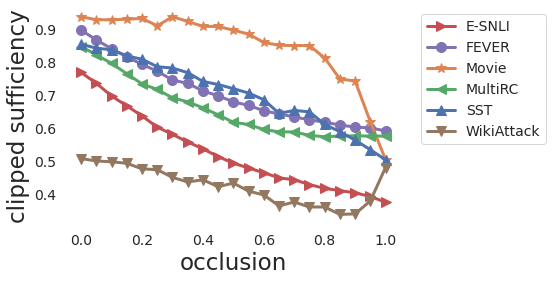

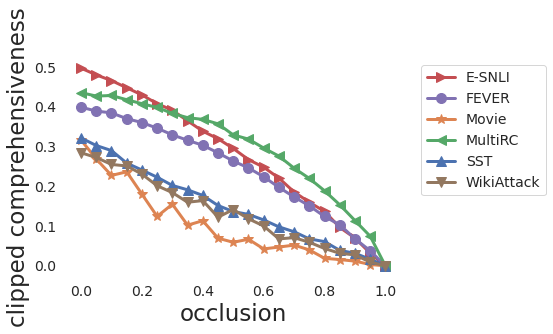

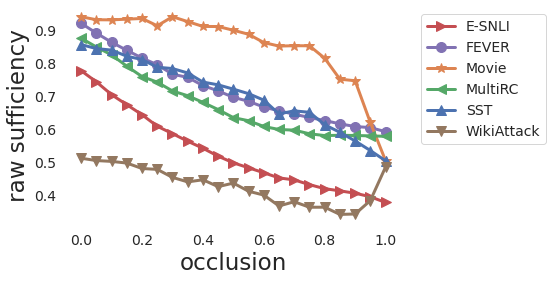

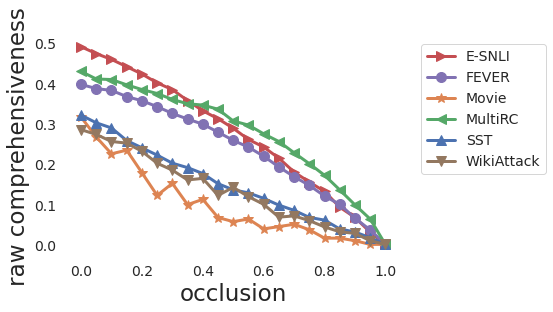

In [28]:
# metric_names= ['sufficiency','comprehensiveness']
names_metrics = [
    ('accuracy','acc'),
    ('sufficiency','normalized_sufficiency'),
    ('comprehensiveness','normalized_comprehensiveness'),
    ('clipped sufficiency','clipped_sufficiency'),
    ('clipped comprehensiveness','clipped_comprehensiveness'),
    ('raw sufficiency','raw_sufficiency'),
    ('raw comprehensiveness','raw_comprehensiveness')]

for name, metric in names_metrics:

    for dataset in meaned_across_samples['d'].unique():
        dataset_df = meaned_across_samples[meaned_across_samples['d'] == dataset]
        dataset_df['occlusion_rate'] = 1-dataset_df['occlusion_rate']
        plt.errorbar(dataset_df['occlusion_rate'], 
            dataset_df[metric], 
            #                  yerr=error, 
            color=dataset_colors[dataset],
            marker=dataset_markers[dataset], 
            linestyle="solid", 
            ecolor=dataset_colors[dataset],
            markersize=MARKERSIZE, 
            label=acc_labels[dataset])


    plt.legend(loc="upper left", bbox_to_anchor=(1.04,1), fontsize=LEGENDLABELSIZE)
    plt.xlabel('occlusion', fontsize=LABELSIZE)
    plt.ylabel(name, fontsize=LABELSIZE)
    plt.tick_params(axis="x", labelsize=TICKLABELSIZE)
    plt.tick_params(axis="y", labelsize=TICKLABELSIZE)
    # plt.savefig("/data/anirudh/output/train_model_debugging/figs/parsimony/sufficiency.pdf", bbox_inches = 'tight', dpi=300)
    plt.show()